In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

### (a) Use the full dataset to fit a logistic regression of today’s stock movement (up or down) on the five lags of returns and the trading volume.

In [2]:
df = pd.read_csv('Weekly.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
df['Direction'] = df['Direction'].map({'Up': 1, 'Down': 0})
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df['Direction']
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [4]:
logistic_model = LogisticRegression().fit(X, y)
#logistic_model.coef_
coef_df = pd.DataFrame({
    'Feature': ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'],
    'Coefficient': logistic_model.coef_[0]
})

print(coef_df)

  Feature  Coefficient
0    Lag1    -0.041234
1    Lag2     0.058392
2    Lag3    -0.016041
3    Lag4    -0.027779
4    Lag5    -0.014453
5  Volume    -0.022739


### (b) Calculate the confusion matrix, accuracy, precision, recall, and F1 score for the in-sample predictions. Does the model uniformly beat random guessing in terms of these performance metrics?

Since the accuracy, precision, recall and F-1 score are all greater than 0.5, the model beats the random guessing.

In [5]:
y_pred = logistic_model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print('Confusion Matrix:\n', conf_matrix)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})
print(metrics_df)

Confusion Matrix:
 [[ 54 430]
 [ 48 557]]
      Metric     Value
0   Accuracy  0.561065
1  Precision  0.564336
2     Recall  0.920661
3   F1 Score  0.699749


### (c) On the same graph, plot precision and recall against the threshold (varying over [0, 1]) used to generate predicted labels from predicted probabilities. Explain the pattern you see.

Precision tends to increase because we become more conservative with predicting the positive class; we demand a higher probability before classifying an observation as positive, which generally leads to fewer false positives.<br>


Recall tends to decrease because as we increase the threshold, we start to miss out on true positives; we become less sensitive to detecting the positive class.


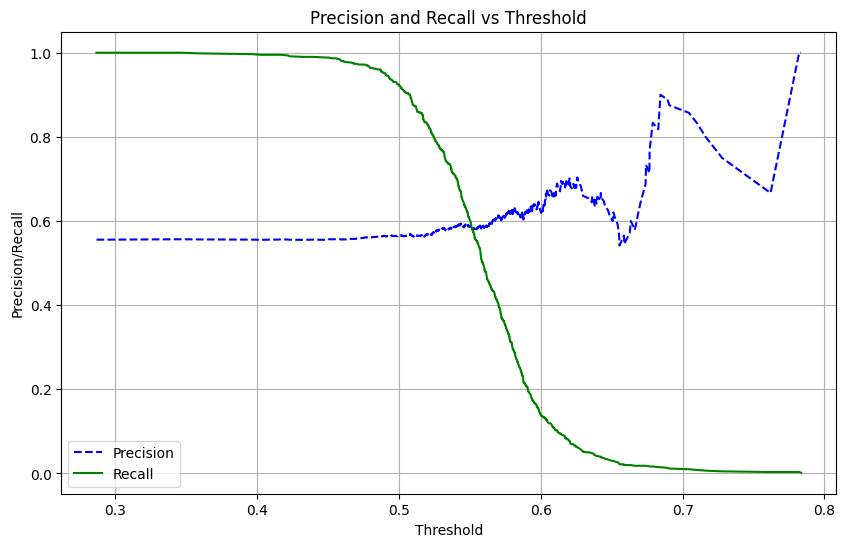

In [6]:
precisions, recalls, thresholds = precision_recall_curve(y, logistic_model.predict_proba(X)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

### (d) Now fit the logistic regression using only data up to (and including) the year 2008, with Lag2 as the only predictor.

In [7]:
df_2008 = df[df['Year'] <= 2008]
X_2008 = df_2008[['Lag2']]
y_2008 = df_2008['Direction']

logistic_model_2008 = LogisticRegression().fit(X_2008, y_2008)
#logistic_model_2008.coef_
lag2_coef_dict = {'Feature': 'Lag2', 'Coefficient': logistic_model_2008.coef_[0][0]}
lag2_coef_df = pd.DataFrame([lag2_coef_dict])
print(lag2_coef_df)




  Feature  Coefficient
0    Lag2     0.058031


### (e) Repeat (b) using the remaining observations as a test sample

In [8]:
X_test = df[df['Year'] > 2008][['Lag2']]
y_test = df[df['Year'] > 2008]['Direction']

y_pred_test = logistic_model_2008.predict(X_test)

conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print('Confusion Matrix:\n', conf_matrix_test)
#conf_matrix_test, accuracy_test, precision_test, recall_test, f1_test
metrics_up_to_2008_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_test, precision_test, recall_test, f1_test]
})
print(metrics_up_to_2008_df)

Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
      Metric     Value
0   Accuracy  0.625000
1  Precision  0.622222
2     Recall  0.918033
3   F1 Score  0.741722


### (f) Which of the two fitted models would you use for real-time stock return prediction?

Based on the provided metrics, the second model (using only "Lag2") performed better on the test sample than the first model (using all lags and volume). It has higher accuracy and F1 score, which suggests it may generalize better to unseen data. This could indicate that "Lag2" is a more robust predictor for this particular task.



